In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Original Draft Data

master_data = pd.read_csv("../starting file/Draft_SD_CSV.csv")

C:\Users\daily\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#Creating WAR Group Column

master_data.loc[(master_data["Total_WAR"] < 5), "WAR Group"] = "Less than 5 WAR"
master_data.loc[(master_data["Total_WAR"] < 10) & (master_data["Total_WAR"] >= 5), "WAR Group"] = "5-10 WAR"
master_data.loc[(master_data["Total_WAR"] < 15) & (master_data["Total_WAR"] >= 10), "WAR Group"] = "10-15 WAR"
master_data.loc[(master_data["Total_WAR"] < 20) & (master_data["Total_WAR"] >= 15), "WAR Group"] = "15-20 WAR"
master_data.loc[(master_data["Total_WAR"] < 25) & (master_data["Total_WAR"] >= 20), "WAR Group"] = "20-25 WAR"
master_data.loc[(master_data["Total_WAR"] >= 25), "WAR Group"] = "More than 25 WAR"
master_data["WAR Group"].fillna("No Major League Experience", inplace = True)

In [4]:
#Limiting the data to only Rays players

rays_data = master_data.loc[master_data["Franchise"] == "Rays"]

#Only showing players that signed with the Rays

signed_rays_data = rays_data.loc[rays_data["Signed"] == "Y"]

#Grouped by draft class

draft_class_year = signed_rays_data.groupby("Year")

#Unsigned Rays draft picks

unsigned_rays_data = rays_data.loc[rays_data["Signed"] == "N"]

In [5]:
#Total WAR by draft class sorted by best to worst

draft_class_year["Total_WAR"].sum().sort_values(ascending = False)

Year
2006    59.2
1999    54.4
2007    35.0
2000    32.5
2010    29.9
2004    28.9
2002    27.5
1998    26.1
2011    10.3
2005     9.7
2001     5.5
2012     5.4
2008     5.2
1996     4.2
2015     3.6
1997     2.7
2013     2.5
2017     0.8
2003     0.5
2018     0.0
2019     0.0
2016    -0.3
2009    -0.9
2014    -0.9
Name: Total_WAR, dtype: float64

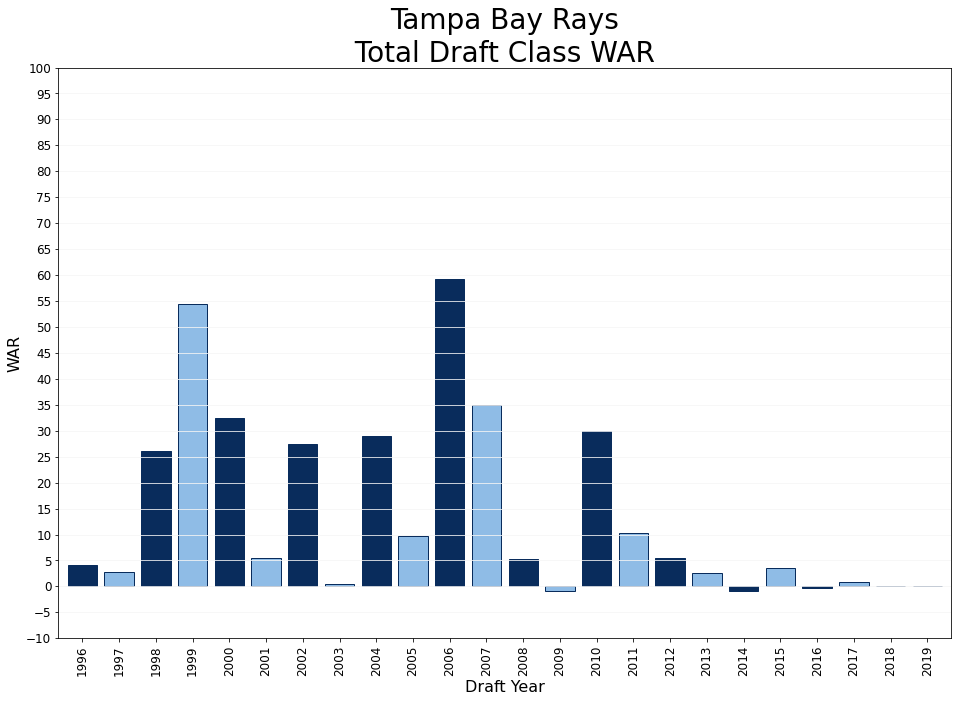

In [6]:
#WAR by draft class year bargraph

draft_class_year["Total_WAR"].sum().plot(kind = "bar", color = ["#092C5C", "#8FBCE6"], width = .8, fontsize = 12, edgecolor = "#092C5C", figsize = (16, 10.5))
plt.title("Tampa Bay Rays\n Total Draft Class WAR ", size = 28)
plt.xlabel("Draft Year", size = 16)
plt.ylabel("WAR", size = 16)
plt.yticks(np.arange(-10, 101, step = 5))
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.savefig("Rays WAR Total by Draft Year.png")
plt.show()

In [7]:
#Best draft picks in franchise history

signed_rays_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
47197,2006,1,3,Devil Rays,Rays,Y,Evan Longoria,2008.0,longoev01,9368.0,37.8,0.0,37.8,3B,4Yr,California State University Long Beach,Long Beach,CA,More than 25 WAR
36823,1999,1,1,Devil Rays,Rays,Y,Josh Hamilton,2007.0,hamiljo03,1875.0,26.5,0.0,26.5,OF,HS,Athens Drive HS,Raleigh,NC,More than 25 WAR
48697,2007,1,1,Devil Rays,Rays,Y,David Price,2008.0,priceda01,3184.0,-0.1,24.4,24.3,LHP,4Yr,Vanderbilt University,Nashville,TN,20-25 WAR
38762,2000,16,466,Devil Rays,Rays,Y,James Shields,2006.0,shielja02,7059.0,0.1,23.9,24.0,RHP,HS,William S. Hart HS,Santa Clarita,CA,20-25 WAR
36874,1999,2,52,Devil Rays,Rays,Y,Carl Crawford,2002.0,crawfca02,1201.0,23.2,0.0,23.2,OF,HS,Jefferson Davis HS,Houston,TX,20-25 WAR
54116,2010,31,941,Rays,Rays,Y,Kevin Kiermaier,2013.0,kiermke01,11038.0,17.5,0.0,17.5,RF,JC,Parkland College,Champaign,IL,15-20 WAR
41235,2002,1,2,Devil Rays,Rays,Y,Melvin Upton Jr.,2004.0,uptonbj01,5015.0,15.4,0.0,15.4,SS,HS,Greenbrier Christian Academy,Chesapeake,VA,15-20 WAR
47483,2006,10,289,Devil Rays,Rays,Y,Desmond Jennings,2010.0,jennide01,1965.0,11.7,0.0,11.7,OF,JC,Itawamba Community College,Fulton,MS,10-15 WAR
44270,2004,3,75,Devil Rays,Rays,Y,Wade Davis,2009.0,daviswa01,7441.0,0.1,11.2,11.3,RHP,HS,Lake Wales HS,Lake Wales,FL,10-15 WAR
54751,2011,1,52,Rays,Rays,Y,Blake Snell,2016.0,snellbl01,13543.0,0.1,11.0,11.1,LHP,HS,Shorewood HS,Shoreline,WA,10-15 WAR


In [8]:
#Biggest draft busts found by looking at first rounders who had less than 5 WAR or didn't make majors

signed_rays_data.loc[((signed_rays_data["WAR Group"] == "Less than 5 WAR") |
(signed_rays_data["WAR Group"] == "No Major League Experience")) & 
(signed_rays_data["Rnd"] == 1)]

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
32061,1996,1,29,Rays,Rays,Y,Paul Wilder,NaN,NaN,NaN,NaN,NaN,NaN,OF,HS,Cary HS,Cary,NC,No Major League Experience
33801,1997,1,31,Rays,Rays,Y,Jason Standridge,2001.0,standja01,1229.0,0.0,-1.0,-1.0,RHP,HS,Hewitt-Trussville HS,Trussville,AL,Less than 5 WAR
39751,2001,1,3,Devil Rays,Rays,Y,Dewon Brazelton,2002.0,brazede01,1195.0,0.0,-0.8,-0.8,RHP,4Yr,Middle Tennessee State University,Murfreesboro,TN,Less than 5 WAR
42716,2003,1,1,Devil Rays,Rays,Y,Delmon Young,2006.0,youngde03,2140.0,-1.2,0.0,-1.2,OF,HS,Adolfo Camarillo HS,Camarillo,CA,Less than 5 WAR
45701,2005,1,8,Devil Rays,Rays,Y,Wade Townsend,NaN,NaN,NaN,NaN,NaN,NaN,RHP,4Yr,Rice University,Houston,TX,No Major League Experience
50150,2008,1,1,Rays,Rays,Y,Tim Beckham,2013.0,beckhti01,7949.0,4.3,0.0,4.3,SS,HS,Griffin HS,Griffin,GA,Less than 5 WAR
53191,2010,1,17,Rays,Rays,Y,Josh Sale,NaN,NaN,NaN,NaN,NaN,NaN,RF,HS,Bishop Blanchet HS,Seattle,WA,No Major League Experience
53205,2010,1,31,Rays,Rays,Y,Justin O'Conner,NaN,NaN,NaN,NaN,NaN,NaN,C,HS,Cowan HS,Muncie,IN,No Major League Experience
53216,2010,1,42,Rays,Rays,Y,Drew Vettleson,NaN,NaN,NaN,NaN,NaN,NaN,RF,HS,Central Kitsap HS,Silverdale,WA,No Major League Experience
54723,2011,1,24,Rays,Rays,Y,Taylor Guerrieri,2018.0,guerrta02,13616.0,0.0,-0.1,-0.1,RHP,HS,Spring Valley HS,Columbia,SC,Less than 5 WAR


In [13]:
#Best unsigned draft picks in franchise history

unsigned_rays_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
41907,2002,23,674,Devil Rays,Rays,N,Jacoby Ellsbury,2007.0,ellsbja01,4727.0,22.2,0.0,22.2,OF,HS,Madras HS,Madras,OR,20-25 WAR
46291,2005,20,598,Devil Rays,Rays,N,Wade Miley,2011.0,mileywa01,8779.0,0.2,12.1,12.3,LHP,HS,Loranger HS,Loranger,LA,10-15 WAR
39623,2000,45,1327,Devil Rays,Rays,N,Luke Scott,2005.0,scottlu01,3469.0,11.0,0.0,11.0,OF,4Yr,Oklahoma State University,Stillwater,OK,10-15 WAR
40307,2001,19,559,Devil Rays,Rays,N,Jason Hammel,2006.0,hammeja01,4538.0,-0.7,10.8,10.1,RHP,JC,Treasure Valley Community College,Ontario,OR,10-15 WAR
39857,2001,4,109,Devil Rays,Rays,N,Dave Bush,2004.0,bushda01,4635.0,-0.4,10.5,10.1,RHP,4Yr,Wake Forest University,Winston-Salem,NC,10-15 WAR
41667,2002,15,434,Devil Rays,Rays,N,Mike Pelfrey,2006.0,pelfrmi01,5203.0,-0.8,10.1,9.3,RHP,HS,Wichita Heights HS,Wichita,KS,5-10 WAR
35353,1997,69,1583,Rays,Rays,N,Heath Bell,2004.0,bellhe01,2080.0,-0.1,9.0,8.9,RHP,JC,Rancho Santiago College,Santa Ana,CA,5-10 WAR
33345,1996,44,1314,Rays,Rays,N,Jason Michaels,2001.0,michaja01,1399.0,8.9,0.0,8.9,OF,JC,Okaloosa-Walton College,Niceville,FL,5-10 WAR
43803,2003,37,1088,Devil Rays,Rays,N,Kris Medlen,2009.0,medlekr01,9417.0,0.5,8.1,8.6,SS,HS,Gahr HS,Cerritos,CA,5-10 WAR
47573,2006,13,379,Devil Rays,Rays,N,Mike Minor,2010.0,minormi01,10021.0,0.1,6.1,6.2,LHP,HS,Forrest HS,Forrest,TN,5-10 WAR


In [9]:
#Best Draft Picks outside the top 10 rounds

hidden_gems = signed_rays_data.loc[signed_rays_data["Rnd"] > 10].sort_values("Total_WAR", ascending = False)

hidden_gems.head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
38762,2000,16,466,Devil Rays,Rays,Y,James Shields,2006.0,shielja02,7059.0,0.1,23.9,24.0,RHP,HS,William S. Hart HS,Santa Clarita,CA,20-25 WAR
54116,2010,31,941,Rays,Rays,Y,Kevin Kiermaier,2013.0,kiermke01,11038.0,17.5,0.0,17.5,RF,JC,Parkland College,Champaign,IL,15-20 WAR
44570,2004,13,375,Devil Rays,Rays,Y,Andy Sonnanstine,2007.0,sonnaan01,7667.0,0.4,4.8,5.2,RHP,4Yr,Kent State University,Kent,OH,5-10 WAR
37327,1999,17,505,Devil Rays,Rays,Y,Matt Diaz,2003.0,diazma02,1771.0,4.8,0.0,4.8,OF,4Yr,Florida State University,Tallahassee,FL,Less than 5 WAR
40757,2001,34,1009,Devil Rays,Rays,Y,Chad Gaudin,2003.0,gaudich01,1783.0,-0.3,4.6,4.3,RHP,HS,Crescent City Baptist HS,Harahan,LA,Less than 5 WAR
35929,1998,18,552,Devil Rays,Rays,Y,Brandon Backe,2002.0,backebr01,1529.0,2.0,1.4,3.4,SS,JC,Galveston College,Galveston,TX,Less than 5 WAR
49061,2007,12,365,Devil Rays,Rays,Y,Stephen Vogt,2012.0,vogtst01,5000.0,3.3,0.0,3.3,1B,4Yr,Azusa Pacific University,Azusa,CA,Less than 5 WAR
40277,2001,18,529,Devil Rays,Rays,Y,Jonny Gomes,2003.0,gomesjo01,1845.0,2.7,0.0,2.7,OF,JC,Santa Rosa Junior College,Santa Rosa,CA,Less than 5 WAR
43053,2003,12,338,Devil Rays,Rays,Y,John Jaso,2008.0,jasojo01,5887.0,2.5,0.0,2.5,C,JC,Southwestern College,Chula Vista,CA,Less than 5 WAR
32516,1996,16,484,Rays,Rays,Y,Jared Sandberg,2001.0,sandbja01,1224.0,2.5,0.0,2.5,3B,HS,Capital HS,Olympia,WA,Less than 5 WAR


In [11]:
#Creating table for percentage of picks by school type

draft_year_school_table_pct = pd.crosstab(rays_data["Year"], rays_data["Type"], normalize = "index")

100 * round(draft_year_school_table_pct,3)

Type,4Yr,HS,JC
Year,,,
1996,28.1,54.2,17.7
1997,16.3,57.6,26.1
1998,19.1,42.6,38.3
1999,20.0,62.0,18.0
2000,34.8,37.0,28.3
2001,26.5,51.0,22.4
2002,16.7,60.4,22.9
2003,38.8,46.9,14.3
2004,42.0,38.0,20.0


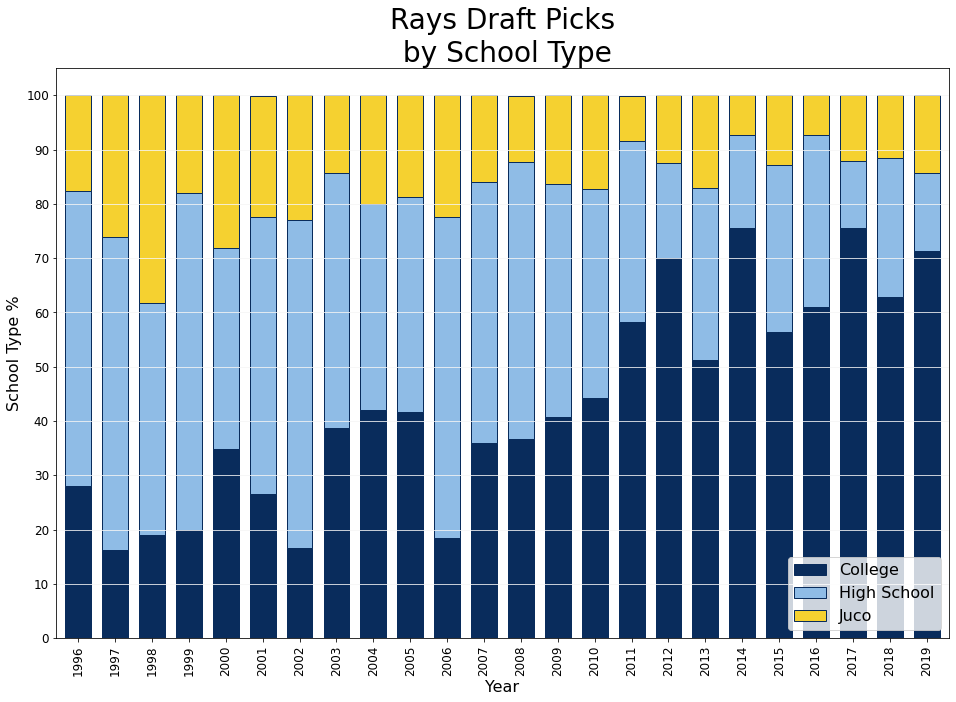

In [12]:
#Bar chart of table above

colors = ["#092C5C", "#8FBCE6", "#F5D130"]

(100 * round(draft_year_school_table_pct,3)).plot(kind = "bar", color = colors, width = .7, fontsize = 12, 
edgecolor = "#092C5C", stacked = True, figsize = (16, 10.5))
plt.title("Rays Draft Picks\n by School Type", size = 28)
plt.xlabel("Year", size = 16)
plt.ylabel("School Type %", size = 16)
plt.yticks(np.arange(0, 101, step = 10))
plt.legend(["College", "High School", "Juco"], loc = "lower right", fontsize = 16)
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.savefig("Rays Draft Picks by School Type.png")
plt.show()